# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [60]:
df = pd.read_csv("/content/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [45]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [61]:
# since my focus is on grade 8 math, hence i will drop out all the following columns:
df = df.drop(['PRIMARY_KEY','GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G','GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G'
, 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'TOTAL_EXPENDITURE', 'TOTAL_REVENUE'], axis = 1)

In [62]:
df = df.dropna()
df

,STATE,YEAR,ENROLL,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_8_G,AVG_MATH_8_SCORE,AVG_READING_4_SCORE
561,ALABAMA,2003,727900.0,567704.0,2966981.0,1661369.0,2817111.0,1521462.0,424662.0,432279.0,59663.0,262.0,207.0
562,ALASKA,2003,133303.0,259423.0,813371.0,353154.0,763525.0,514052.0,55715.0,247005.0,11140.0,279.0,212.0
563,ARIZONA,2003,875111.0,740579.0,2912629.0,2876686.0,2810907.0,1964229.0,303924.0,864642.0,76376.0,271.0,209.0
564,ARKANSAS,2003,450158.0,379947.0,2394336.0,466992.0,1768713.0,972598.0,170767.0,247245.0,37004.0,266.0,214.0
565,CALIFORNIA,2003,6226552.0,5795655.0,33617766.0,20402434.0,29561563.0,17030335.0,2995767.0,7341541.0,500143.0,267.0,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,VIRGINIA,2015,1279867.0,1012205.0,6240349.0,8604970.0,8755896.0,5075509.0,627473.0,1086722.0,95221.0,288.0,229.0
1220,WASHINGTON,2015,1072359.0,1036422.0,8293812.0,4379208.0,6508964.0,4510672.0,546926.0,1601069.0,79483.0,287.0,226.0
1221,WEST_VIRGINIA,2015,279565.0,362959.0,1979466.0,1135976.0,1819903.0,1161944.0,233836.0,232738.0,20426.0,271.0,216.0
1222,WISCONSIN,2015,861813.0,814385.0,5869265.0,4953726.0,5723474.0,3691809.0,513402.0,894823.0,61084.0,289.0,223.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset?

In [18]:
max(df['YEAR']) - min(df['YEAR'])

12

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

### Ohio has the higher average score than Michigan. Ohio : 285.714286 vs Michigan: 278.000000


In [19]:
df.groupby(by ='STATE')['AVG_MATH_8_SCORE'].mean()

STATE
ALABAMA                 266.285714
ALASKA                  281.285714
ARIZONA                 277.142857
ARKANSAS                274.285714
CALIFORNIA              271.428571
COLORADO                286.428571
CONNECTICUT             284.571429
DELAWARE                281.428571
DISTRICT_OF_COLUMBIA    254.000000
FLORIDA                 276.428571
GEORGIA                 275.857143
HAWAII                  273.285714
IDAHO                   284.142857
ILLINOIS                281.000000
INDIANA                 285.000000
IOWA                    284.714286
KANSAS                  287.285714
KENTUCKY                278.142857
LOUISIANA               270.285714
MAINE                   285.428571
MARYLAND                284.000000
MASSACHUSETTS           296.142857
MICHIGAN                278.000000
MINNESOTA               293.000000
MISSISSIPPI             266.285714
MISSOURI                281.142857
MONTANA                 288.571429
NEBRASKA                284.000000
NEVADA        

Find the average for your outcome score across all states in 2019

### Based on my preprocessing my data, I do not have 2019 value in my dataset.

In [29]:
df[df['YEAR'] == '2019']

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_8_G,AVG_MATH_8_SCORE,AVG_READING_4_SCORE


Find the maximum outcome score for every state.

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [30]:
df.groupby(by ='STATE')['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X  = df.drop(['AVG_MATH_8_SCORE', "STATE"], axis = 1)
y = df['AVG_MATH_8_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)

Feature engineering justification: ** Need to normalize the variables because of various units present in the dataset such as dollars and score. This enables the model to give weights to the variables accurately**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

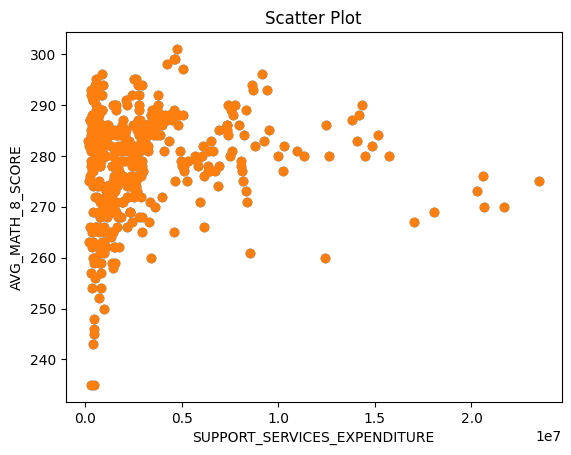

In [48]:
import matplotlib.pyplot as plt

t = df.drop(['AVG_MATH_8_SCORE', "STATE"], axis = 1)
plt.scatter(t['SUPPORT_SERVICES_EXPENDITURE'], y)
plt.title('Scatter Plot')
plt.scatter(t['SUPPORT_SERVICES_EXPENDITURE'], y)
plt.xlabel('SUPPORT_SERVICES_EXPENDITURE')
plt.ylabel('AVG_MATH_8_SCORE')
plt.show()

Most states spent less than 5 million per year on support services.

**Visualization 2**

<Axes: xlabel='STATE_REVENUE', ylabel='AVG_MATH_8_SCORE'>

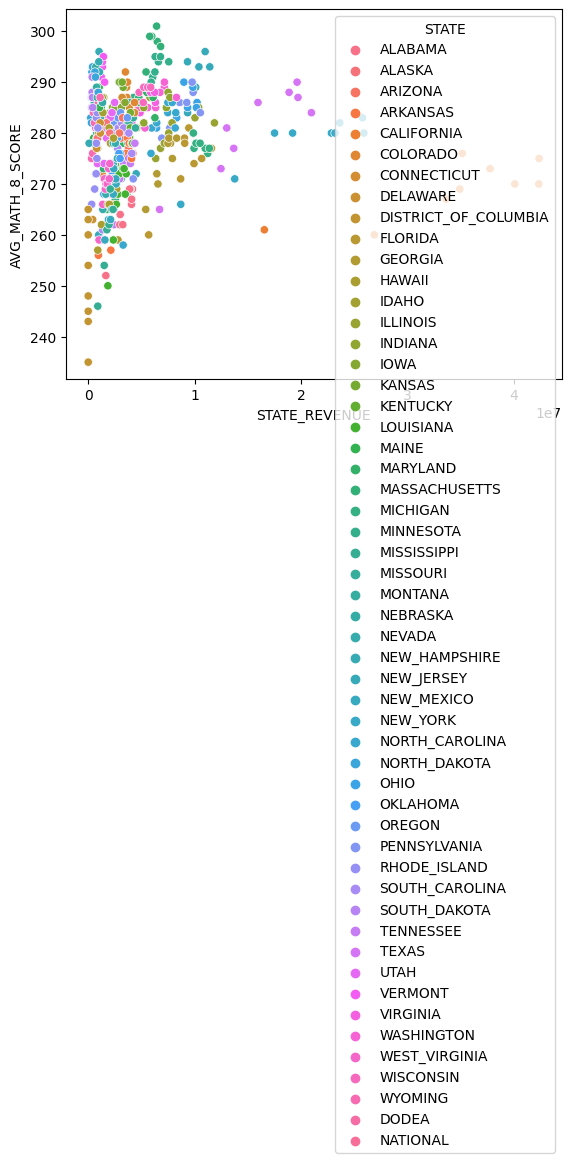

In [51]:
import seaborn as sns

sns.scatterplot(data=df, x="STATE_REVENUE", y="AVG_MATH_8_SCORE", hue="STATE")

State revenue vs grade 8 math test score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [63]:
X  = df.drop(['AVG_MATH_8_SCORE', "STATE"], axis = 1)
y = df['AVG_MATH_8_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [53]:
# import your sklearn class here
from sklearn.neighbors import KNeighborsRegressor

In [64]:
# create your model here
model = KNeighborsRegressor(n_neighbors=3)

In [65]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [68]:
from sklearn.metrics import mean_squared_error

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

Mean squared error: 24.09


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

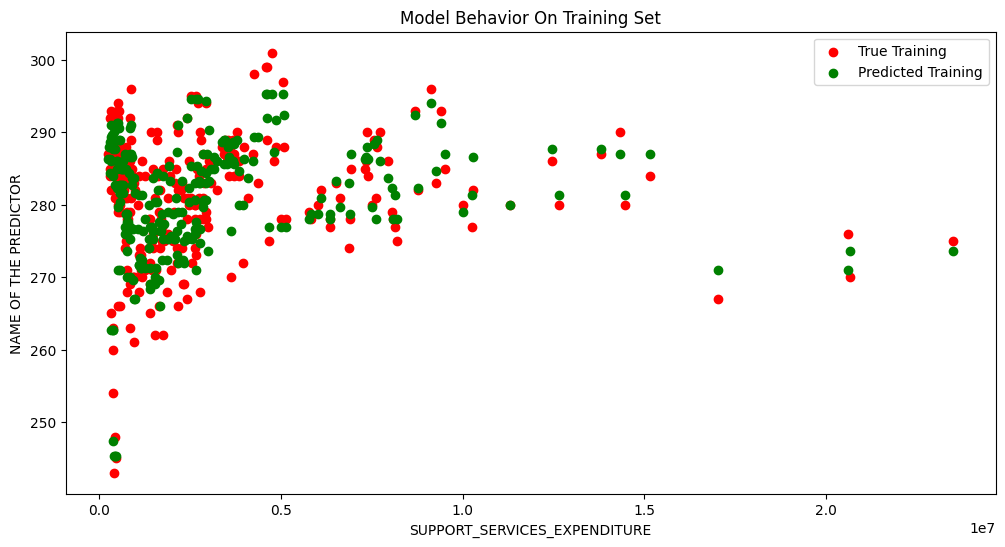

In [69]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

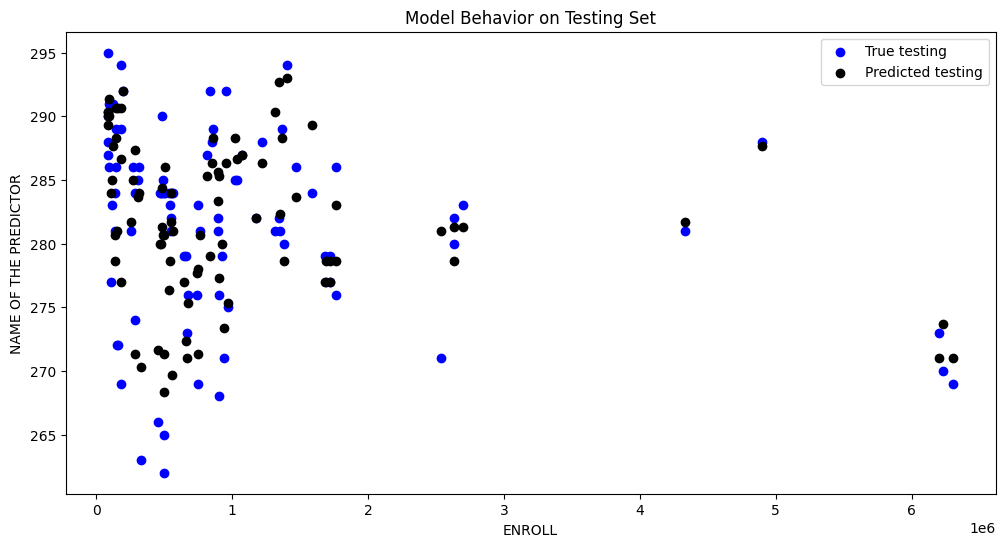

In [70]:
col_name = 'ENROLL'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

** I have conducted a k-NN regression model on predicting the 8th-grade scores. For the preprocessing, I have removed NaN values and columns that I identified as unrelated to the grade 8 scores, such as the number of 4th-graders and 4th-grade scores. I normalized the variables using a standard scaler because the columns contained various units such as numbers, dollars, and scores. I found that both visualizations were predominantly non-linear graphs when exploring the data. I deduced that implementing a linear regression would be an accurate representation model, thus choosing a k-NN regression model. Implementing the k-NN regression model enabled the model to produce a Mean Squared error(MSE) of 24.09, which is acceptable since I have not hyperparametrized any variables. Further evaluation can be done, such as identifying which k value would hold the lowest MSE.           **